<a href="https://colab.research.google.com/github/Zolberg101/smg_nn/blob/master/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.02173571102321148


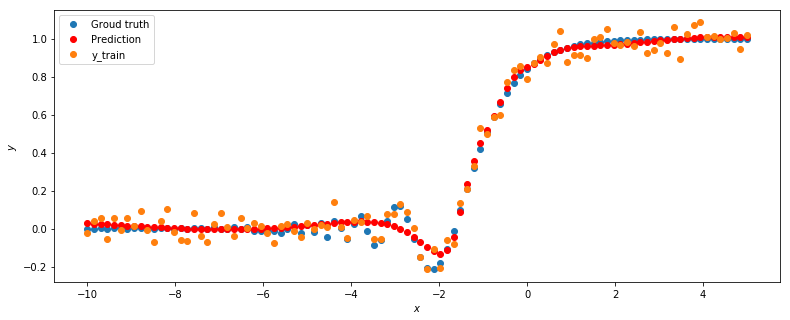

In [303]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import math
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
#Sigmoid LeakyReLU
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(500)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
#Adam - SGD
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()
  
for epoch_index in range(5000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

print(metric(net.forward(x_validation), y_validation).item())

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.plot(x.numpy(), y_train.data.numpy(), 'o', label='y_train');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    

predict(net, x_validation, y_validation)

